<a href="https://colab.research.google.com/github/abxda/python-stats/blob/main/STAT_Semana_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muestras y Poblaciones
**Descripción:**

- **Definición de población y muestra**: La población es el conjunto total de elementos que se desea estudiar, mientras que la muestra es un subconjunto representativo de la población.
- **Diferencias entre parámetros muestrales y poblacionales**: Los parámetros muestrales se calculan a partir de la muestra y se utilizan para estimar los parámetros poblacionales.
- **Importancia del muestreo en la inferencia estadística**: El muestreo permite hacer inferencias sobre la población sin necesidad de examinar a todos sus miembros.
- **Ejemplos de cómo se utilizan las muestras para estimar valores poblacionales**: A través de la media muestral, varianza muestral, etc.

**Código Python:**

Media muestral: 48.43400818208205
Media poblacional: 50.01730649264142


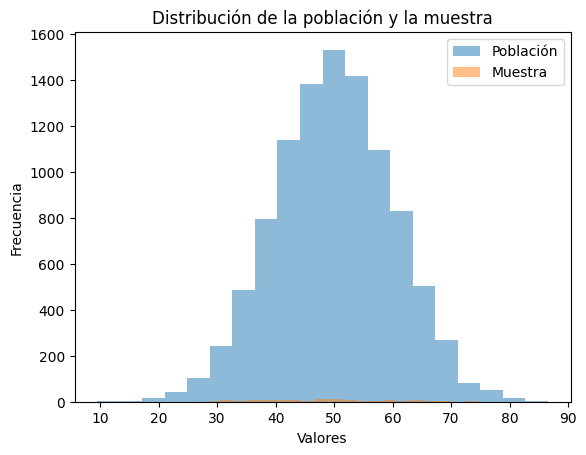

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generar una población
mu = 50
sigma = 10
poblacion = np.random.normal(mu,sigma, size=10000)

# Obtener una muestra aleatoria de la población
muestra = np.random.choice(poblacion, size=100, replace=False)

# Calcular la media muestral
media_muestral = np.mean(muestra)

# Calcular la media poblacional
media_poblacional = np.mean(poblacion)

print(f"Media muestral: {media_muestral}")
print(f"Media poblacional: {media_poblacional}")

# Visualizar la distribución de la población y la muestra
plt.hist(poblacion, bins=20, alpha=0.5, label='Población')
plt.hist(muestra, bins=20, alpha=0.5, label='Muestra')
plt.legend(loc='upper right')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la población y la muestra')
plt.show()

### Inferencia y Estimación Puntual

**Descripción:**

#### Definición de inferencia estadística:
La inferencia estadística es el proceso de deducir propiedades de una población a partir de una muestra de datos tomada de esa población. Este proceso nos permite hacer afirmaciones sobre la población completa sin tener que examinar a todos sus miembros. Por ejemplo, si queremos saber la altura promedio de los adultos en una ciudad, no necesitamos medir a cada adulto. En su lugar, podemos medir una muestra representativa y usar inferencia estadística para estimar la altura promedio de la población.

#### Introducción al concepto de estimador y estimación puntual:
Un estimador es una regla o fórmula que usamos para calcular una estimación de un parámetro poblacional basado en una muestra. La estimación puntual es el valor específico que obtenemos usando ese estimador. Por ejemplo, si usamos la media muestral ($\bar{x}$) para estimar la media poblacional ($\mu$), $\bar{x}$ es el estimador y el valor específico de $\bar{x}$ que calculamos a partir de una muestra es la estimación puntual.

#### Ejemplo intuitivo:
Imagina que quieres saber el promedio de caramelos en las bolsas producidas en una fábrica. En lugar de abrir todas las bolsas, tomas una muestra aleatoria de 10 bolsas, cuentas los caramelos en cada una y calculas el promedio de esos 10 valores. Este promedio es tu estimación puntual del promedio de caramelos en todas las bolsas.

#### Estimador de máxima verosimilitud para la media poblacional:
El estimador de máxima verosimilitud es un método común para estimar parámetros poblacionales. Para la media poblacional ($\mu$), el estimador de máxima verosimilitud es simplemente la media muestral ($\bar{x}$). Esto significa que calculamos la media de los valores en nuestra muestra y la usamos como la mejor estimación de la media de la población.

#### Ejemplo intuitivo:
Si tomas una muestra de 10 estudiantes y calculas su calificación promedio en un examen, esa calificación promedio es tu mejor estimación de la calificación promedio de todos los estudiantes que tomaron el examen.

#### Estimación insesgada para la varianza poblacional:
La varianza mide la dispersión de los datos alrededor de la media. Para estimar la varianza poblacional ($\sigma^2$), usamos la cuasivarianza muestral. Esto se debe a que dividir por $n-1$ en lugar de $n$ (donde $n$ es el tamaño de la muestra) proporciona una estimación más precisa. Esta corrección se llama corrección de Bessel.

#### Fórmula:
Si $x_1, x_2, \ldots, x_n$ son los valores de una muestra y $\bar{x}$ es la media muestral, la cuasivarianza muestral (s^2) se calcula como:
$ s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $

#### Ejemplo intuitivo:
Imagina que tienes 5 mediciones de temperatura en un día: 18, 20, 19, 21 y 20 grados. Primero, calculas la media de estas mediciones. Luego, calculas la diferencia entre cada medición y la media, las elevas al cuadrado, sumas estos valores y finalmente divides por $n-1$ para obtener la varianza muestral.

### Resumen de Conceptos:

1. **Inferencia Estadística**: Nos permite hacer afirmaciones sobre una población basándonos en una muestra.
2. **Estimador y Estimación Puntual**: Un estimador es una fórmula usada para calcular una estimación. La estimación puntual es el valor específico obtenido usando el estimador.
3. **Estimador de Máxima Verosimilitud**: La media muestral ($\bar{x}$) es el estimador de máxima verosimilitud para la media poblacional ($\mu$).
4. **Estimación Insesgada de la Varianza**: La cuasivarianza muestral (s^2) se usa para estimar la varianza poblacional ($\sigma^2$), proporcionando una estimación más precisa que dividir por $n$.
**Código Python:**


In [2]:
# Generar una muestra
mu = 50
sigma = 10
muestra = np.random.normal(mu,sigma, size=100)

# Calcular la media muestral (estimador de la media poblacional)
media_muestral = np.mean(muestra)

# Calcular la cuasivarianza muestral (estimador insesgado de la varianza poblacional)
cuasivarianza_muestral = np.var(muestra, ddof=1)

print(f"Estimación de la media poblacional: {media_muestral}")
print(f"Estimación de la varianza poblacional: {cuasivarianza_muestral}")

Estimación de la media poblacional: 51.89772463321095
Estimación de la varianza poblacional: 99.26428197027735


### Esperanza Matemática

**Descripción:**

#### Definición de esperanza matemática:
La esperanza matemática, también conocida como valor esperado, es una medida de la centralidad de una distribución de probabilidad. Se puede entender como el promedio ponderado de todos los posibles valores que puede tomar una variable aleatoria, donde cada valor está ponderado por su probabilidad de ocurrencia. Es un concepto fundamental en la teoría de la probabilidad y la estadística, ya que proporciona una medida del "centro" de la distribución.

#### Interpretación de la esperanza matemática como el valor esperado de una variable aleatoria:
La interpretación intuitiva de la esperanza matemática es que representa el valor promedio que se espera obtener si se repite un experimento aleatorio un gran número de veces. Por ejemplo, si lanzas una moneda justa muchas veces, la esperanza matemática del número de caras es el número total de lanzamientos multiplicado por la probabilidad de obtener cara en cada lanzamiento (que es 0.5).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir una variable aleatoria normal con media (mu) y desviación estándar (sigma)
mu = 50
sigma = 10
X = norm(mu, sigma)

# Calcular la esperanza matemática de X
# Para una distribución normal, la esperanza matemática es igual a la media (mu)
esperanza_X = X.expect()

print(f"Esperanza matemática de X: {esperanza_X}")

# Visualizar la función de densidad de probabilidad (PDF) de X
# Generar un rango de valores de x desde el percentil 1% hasta el 99% de la distribución
x = np.linspace(X.ppf(0.01), X.ppf(0.99), 100)

# Calcular la PDF para cada valor de x
pdf_values = X.pdf(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, 'r-', lw=2, alpha=0.6, label='Densidad de probabilidad (PDF)')

# Dibujar una línea vertical en el valor de la esperanza matemática
plt.axvline(esperanza_X, color='b', linestyle='dashed', linewidth=2, label='Esperanza matemática')

# Añadir etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Función de Densidad de Probabilidad de una Distribución Normal')
plt.legend(loc='best')

# Mostrar la gráfica
plt.grid(True)
plt.show()


# Modelos de Mixtura

**Descripción:**

- **Introducción a los modelos de mixtura**: Los modelos de mixtura son modelos probabilísticos que representan una población que puede estar compuesta por varias subpoblaciones, cada una con su propia distribución de probabilidad.
- **Aplicaciones de los modelos de mixtura para identificar subpoblaciones dentro de una población**: Los modelos de mixtura se utilizan en diversas áreas como la biología, la economía y la ingeniería para identificar y analizar subgrupos dentro de una población global.
- **Ejemplos de modelos de mixtura con distribuciones normales**: En muchos casos, se asume que las subpoblaciones siguen distribuciones normales, lo que facilita la identificación de estas subpoblaciones mediante modelos de mixtura gaussiana.

**Código Python:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generar datos de dos subpoblaciones normales
mu1 = 20
sigma1 = 5
mu2 = 80
sigma2 = 10
X1 = np.random.normal(mu1, sigma1, size=100)
X2 = np.random.normal(mu2, sigma2, size=100)
X = np.concatenate((X1, X2))

# Ajustar un modelo de mixtura gaussiana con dos componentes
modelo = GaussianMixture(n_components=2)
modelo.fit(X.reshape(-1, 1))

# Obtener las etiquetas de las subpoblaciones
etiquetas = modelo.predict(X.reshape(-1, 1))

# Visualizar los datos con las etiquetas de las subpoblaciones
plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, alpha=0.5, label='Datos observados', density=True)

# Generar valores para las campanas subyacentes
x = np.linspace(np.min(X), np.max(X), 1000)
logprob = modelo.score_samples(x.reshape(-1, 1))
responsibilities = modelo.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * np.exp(logprob[:, np.newaxis])
pdf = pdf_individual.sum(1)

# Visualizar las campanas de las subpoblaciones
plt.plot(x, pdf, '-k', label='Mixtura Gaussiana')
plt.plot(x, pdf_individual[:, 0], '--', label='Componente 1')
plt.plot(x, pdf_individual[:, 1], '--', label='Componente 2')

# Añadir puntos muestreados coloreados según las etiquetas
colors = ['red', 'black']
for label in np.unique(etiquetas):
    plt.scatter(X[etiquetas == label], np.zeros_like(X[etiquetas == label]),
                c=colors[label], label=f'Subpoblación {label + 1}', s=50, zorder=3)


plt.legend()
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Modelo de Mixtura Gaussiana con Subpoblaciones')
plt.show()

# Clustering (Agrupamiento)

**Descripción:**

- **Introducción al clustering**: El clustering es una técnica de análisis de datos que busca agrupar un conjunto de objetos en subgrupos (clusters) de tal manera que los objetos en el mismo grupo (cluster) sean más similares entre sí que con los objetos de otros grupos.
- **Diferentes tipos de algoritmos de clustering**:
  - **K-means**: Un algoritmo que particiona los datos en K clusters, minimizando la variabilidad dentro de cada cluster.
  - **Clustering jerárquico**: Construye una jerarquía de clusters que pueden ser visualizados mediante un dendrograma.
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Agrupa puntos que están juntos en regiones de alta densidad y puede identificar outliers.
- **Aplicaciones del clustering en diferentes áreas**: El clustering se utiliza ampliamente en marketing (segmentación de clientes), biología (clasificación de especies), biblioteconomía (organización de libros), imagenología médica (detección de estructuras), entre otros.

**Ejemplo de Clustering con K-means en Python:**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generar datos de tres subpoblaciones normales bidimensionales
mu1 = [7, 7]
sigma1 = [[1, 0.5], [0.5, 1]]
mu2 = [8, 8]
sigma2 = [[1, -0.5], [-0.5, 1]]
mu3 = [5, 10]
sigma3 = [[1, 0.5], [0.5, 1]]

X1 = np.random.multivariate_normal(mu1, sigma1, 100)
X2 = np.random.multivariate_normal(mu2, sigma2, 100)
X3 = np.random.multivariate_normal(mu3, sigma3, 100)
X = np.concatenate((X1, X2, X3))

# Ajustar un modelo k-means con tres clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
etiquetas = kmeans.labels_

# Obtener las coordenadas de los centroides
centroides = kmeans.cluster_centers_

# Crear una malla de puntos para visualizar las áreas de influencia
h = .02  # tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las etiquetas para cada punto en la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar las áreas de influencia y los datos
plt.figure(figsize=(10, 8))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='viridis', aspect='auto', origin='lower', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=np.concatenate((np.zeros(100), np.ones(100), np.full(100, 2))), cmap='viridis', s=50, alpha=0.6, edgecolors='w', label='Datos')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroides')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Clustering con K-means y Áreas de Influencia')
plt.legend()
plt.show()


# Grupos Difusos (Fuzzy Clustering)

**Descripción:**

- **Introducción al fuzzy clustering**: El fuzzy clustering es una técnica de agrupamiento que permite que los datos pertenezcan a más de un grupo (cluster) con diferentes grados de pertenencia. Este método es útil en situaciones donde los límites entre los grupos no están claramente definidos.
- **Diferencias entre el clustering tradicional y el fuzzy clustering**: A diferencia del clustering tradicional (como K-means), donde cada punto pertenece exclusivamente a un cluster, el fuzzy clustering asigna a cada punto un grado de pertenencia a cada cluster, representado por un valor entre 0 y 1.
- **Aplicaciones del fuzzy clustering en situaciones donde los individuos pueden pertenecer a más de un grupo**: Este método se utiliza en áreas como la segmentación de mercados, el análisis de imágenes médicas, y la biología, donde las características de los individuos pueden no pertenecer completamente a un solo grupo.

**Ejemplo de Fuzzy Clustering con Fuzzy C-means en Python:**

A continuación, presentamos un ejemplo práctico usando el algoritmo Fuzzy C-means para realizar clustering en un conjunto de datos generado aleatoriamente.

**Código Python (Fuzzy C-means):**

In [ ]:
!pip install fuzzy-c-means

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from fcmeans import FCM

# Generar datos de tres subpoblaciones normales bidimensionales
np.random.seed(42)  # Fijar la semilla para reproducibilidad
mu1 = [5, 5]
sigma1 = [[1, 0.5], [0.5, 1]]
mu2 = [8, 8]
sigma2 = [[1, -0.5], [-0.5, 1]]
mu3 = [5, 10]
sigma3 = [[1, 0.5], [0.5, 1]]

X1 = np.random.multivariate_normal(mu1, sigma1, 100)
X2 = np.random.multivariate_normal(mu2, sigma2, 100)
X3 = np.random.multivariate_normal(mu3, sigma3, 100)
X = np.concatenate((X1, X2, X3))

# Etiquetas de clases reales
real_labels = np.concatenate((np.zeros(100), np.ones(100), np.full(100, 2)))

# Ajustar un modelo Fuzzy C-means con tres clusters
fcm = FCM(n_clusters=3, random_state=42)
fcm.fit(X)

# Obtener las probabilidades de pertenencia a los clusters
probabilidades = fcm.u

# Obtener las coordenadas de los centroides
centroides = fcm.centers

# Identificar la clase dominante y su probabilidad para cada punto
dominant_class = np.argmax(probabilidades, axis=1)
dominant_prob = np.max(probabilidades, axis=1)

# Colores de las clases estimadas
estimated_colors = ['r', 'g', 'b']
# Símbolos para las clases reales
real_symbols = ['o', '^', 's']

# Visualizar los datos con las probabilidades de pertenencia
plt.figure(figsize=(10, 8))

# Capa 1: Estimaciones con transparencia
for j in range(X.shape[0]):
    plt.scatter(X[j, 0], X[j, 1], color=estimated_colors[dominant_class[j]], alpha=dominant_prob[j], edgecolor=estimated_colors[dominant_class[j]], linewidths=0)

# Capa 2: Clases reales con símbolos
for label in np.unique(real_labels):
    plt.scatter(X[real_labels == label, 0], X[real_labels == label, 1], facecolor='none', edgecolor='gray', marker=real_symbols[int(label)], s=100, linewidths=1, label=f'Clase Real {int(label) + 1}')

plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=200, linewidths=1, color='black', label='Centroides')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Fuzzy Clustering con C-means')
plt.legend()
plt.show()